In [8]:
pip install haversine
pip install shapely
pip install geopandas
pip install geojson
pip install folium
pip install tqdm
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached matplotlib-3.7.3-cp39-cp39-win_amd64.whl (7.5 MB)
  Using cached contourpy-1.1.0-cp39-cp39-win_amd64.whl (429 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
  Using cached Pillow-10.0.0-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached importlib_resources-6.0.1-py3-none-any.whl (34 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
  Using cached fonttools-4.42.1-cp39-cp39-win_amd64.whl (2.1 MB)


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [9]:
import requests
import random
import pandas as pd 
from tqdm import tqdm
from cred_here_Template import YOUR_API_KEY
import json 

import ast

# Tools

import folium
from shapely.geometry import Polygon
import numpy as np
import geojson
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import shapely.wkt
from haversine import haversine, Unit
import random
import time
from pyproj import Geod

from shapely import wkt
from geopandas import datasets, GeoDataFrame, read_file, points_from_xy
from geopandas.tools import overlay
from geopandas.tools import sjoin

from folium.plugins import MeasureControl
from folium.plugins import MarkerCluster

from tqdm import tqdm
import json

import requests
import random
import time 

In [249]:
df_map = pd.read_csv('DATASET_FINAL.csv')

In [250]:
df_map.head(2)

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Full_Address,Coords
0,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,DIESEL,31.75,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)"
1,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,REGULAR,34.50,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)"


In [12]:
# df_map = df_map.drop_duplicates(subset=['Nombre_comercial','Bandera','Producto'])

In [251]:
len(df_map)

3063

In [252]:
df_map['Coords'].value_counts()

Coords
(14.76616, -90.99132)    99
(14.4647, -90.44078)     78
(14.46466, -90.44077)    78
(14.76617, -90.99133)    72
(14.46467, -90.44077)    66
                         ..
(14.27218, -90.76442)     3
(14.8672, -91.62335)      3
(14.86723, -91.62335)     3
(14.2808, -90.76867)      3
(14.58739, -90.54511)     3
Name: count, Length: 268, dtype: int64

In [253]:
df_map[df_map['Coords']=="('NA', 'NA')"]['Direccion'].unique()

array(['1 AVENIDA 1-14 ZONA 16 GUATEMALA',
       '1 AVENIDA 3-18 ZONA 5 GUATEMALA',
       '1 AVENIDA 4-19 ZONA 14 GUATEMALA',
       '10 AVENIDA 4-9 ZONA 11 GUATEMALA',
       '3 AVENIDA 2-12 ZONA 13 GUATEMALA',
       '3 AVENIDA 3-21 ZONA 14 GUATEMALA',
       '3 AVENIDA 4-15 ZONA 11 GUATEMALA',
       '4 AVENIDA 3-10 ZONA 21 GUATEMALA',
       '4 AVENIDA 4-17 ZONA 3 GUATEMALA',
       '5 AVENIDA 2-16 ZONA 9 GUATEMALA',
       '5 AVENIDA 2-21 ZONA 6 GUATEMALA',
       '5 AVENIDA 3-13 ZONA 13 GUATEMALA',
       '5 AVENIDA 4-19 ZONA 19 GUATEMALA',
       '6 AVENIDA 1-15 ZONA 18 GUATEMALA',
       '7 AVENIDA 3-13 ZONA 7 GUATEMALA',
       '7 AVENIDA 3-16 ZONA 5 GUATEMALA',
       '7 AVENIDA 3-19 ZONA 15 GUATEMALA',
       '7 AVENIDA 3-19 ZONA 9 GUATEMALA',
       '9 AVENIDA 3-14 ZONA 8 GUATEMALA'], dtype=object)

In [52]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054 entries, 0 to 3053
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Periodo              3054 non-null   int64  
 1   Mes                  3054 non-null   int64  
 2   Codigo_departamento  3054 non-null   int64  
 3   Departamento         3054 non-null   object 
 4   Codigo_municipio     3054 non-null   int64  
 5   Municipio            3054 non-null   object 
 6   Nombre_comercial     3054 non-null   object 
 7   Bandera              3054 non-null   object 
 8   Direccion            3054 non-null   object 
 9   Producto             3054 non-null   object 
 10  Precio               3054 non-null   float64
 11  Estado               3054 non-null   object 
 12  Full_Address         3054 non-null   object 
 13  Coords               3054 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 334.2+ KB


In [53]:
df_map['Coords'][0]

'(14.46466, -90.44077)'

In [254]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[0]) # Lat

14.58739

In [255]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[1].strip()) # Longitud

-90.54511

In [256]:
df_map['LAT'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[0]) if x !=  "('NA', 'NA')"  else 'Empty')
df_map['LNG'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[1]) if x !=  "('NA', 'NA')"  else 'Empty')

In [257]:
df_map['LAT'].value_counts()

LAT
14.46466    114
14.76616     99
14.76017     81
14.76614     78
14.46470     78
           ... 
16.92285      3
15.00054      3
15.00056      3
14.54147      3
14.67992      3
Name: count, Length: 245, dtype: int64

In [58]:
df_map['LNG'].value_counts()

LNG
-90.44077    201
-90.44078    123
-90.98821    108
-90.99132     99
-90.99134     93
            ... 
-91.62336      3
-90.69743      3
-90.75152      3
-90.92377      3
-91.15344      3
Name: count, Length: 205, dtype: int64

# Funciones a usar 

In [59]:
def GetLatLon2(Address,YOUR_API_KEY): 

    url2_geocode  = f'https://geocode.search.hereapi.com/v1/geocode?q={Address}&apiKey='+YOUR_API_KEY
    
    try:
        response = requests.get(url2_geocode).json()
        CleanAddress = response['items'][0]['title'].upper()
        LAT = response['items'][0]['position']['lat']
        LON = response['items'][0]['position']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]

    except:
        results = ['NotFound','NA','NA']

    return results

def GetLatLon2_google(Address,YOUR_API_KEY): 

    api_url = f'https://maps.googleapis.com/maps/api/geocode/json?address={Address}&key={YOUR_API_KEY}'

    try:
        j = requests.get(api_url).json()
        CleanAddress = str(j['results'][0]['formatted_address']).upper()
        LAT = j['results'][0]['geometry']['location']['lat']
        LON = j['results'][0]['geometry']['location']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]

    except:
        results = ['NotFound','NA','NA']

    return results,j 

def cal_dist(geo_source,point2,unit):
    
    if unit == 'Km':
        distance = haversine(geo_source, point2,Unit.KILOMETERS)

    elif unit == 'm':
        distance = haversine(geo_source, point2,Unit.METERS)

    elif unit == 'miles':
        distance = haversine(geo_source, point2,Unit.MILES)
    
    return round(distance,2)


def distance_estac(geo_source,df,radio,unit):
    
    distancia = []
    source = []

    for i in tqdm(range(len(df)),colour = 'green'):
        distancia.append(cal_dist(geo_source,df['POINT'][i],unit))
        source.append(geo_source)

    new_df = df.copy()
    new_df['SOURCE'] = source
    new_df['DISTANCE'] = distancia
    new_df = new_df[new_df['DISTANCE']<=radio]
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns ='index')

    return new_df.sort_values(by='DISTANCE',ascending=True)

def transform_df_map(df):
    
    coordenadas = []

    for i in range(len(df)):
        
        try :
            coord = float(df['LAT'][i]),float(df['LNG'][i])
            coordenadas.append(coord)

        except :
            coordenadas.append('EMPTY')
            
    df['POINT'] = coordenadas
    df = df[df['POINT']!='EMPTY']
    df = df.reset_index()
    df = df.drop(columns = 'index')
    new_df = df.copy()
    
    return new_df

# Paso a Paso de la App

1. Filtrar la ciudad
2. Ingresar la central location
3. Configurar el radio y la unidad de medida
4. Calcular la distancia


# Filtrar ciudad

In [60]:
cities = list(df_map['Municipio'].unique())
cities

['GUATEMALA']

In [258]:
df_city = df_map[df_map['Municipio']==cities[0]] #Unicamente el municipio que esta Guatemala
df_city.reset_index(inplace =  True)
df_city.drop(columns= 'index' , inplace = True)
df_city

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Full_Address,Coords,LAT,LNG
0,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,DIESEL,31.75,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511
1,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,REGULAR,34.50,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511
2,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,SUPER,37.20,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511
3,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,TEXACO,CALZADA ATANASIO TZUL TEXACO GUATEMALA,DIESEL,35.15,A,"CALZADA ATANASIO TZUL TEXACO GUATEMALA, GUATEMALA","(14.58915, -90.54215)",14.58915,-90.54215
4,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,TEXACO,CALZADA ATANASIO TZUL TEXACO GUATEMALA,REGULAR,36.50,A,"CALZADA ATANASIO TZUL TEXACO GUATEMALA, GUATEMALA","(14.58915, -90.54215)",14.58915,-90.54215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PLAZA BOLIVAR S.A.S,UNO,9 AVENIDA 4-9 ZONA 12 GUATEMALA,REGULAR,36.50,A,"9 AVENIDA 4-9 ZONA 12 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182
3059,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PLAZA BOLIVAR S.A.S,UNO,9 AVENIDA 4-9 ZONA 12 GUATEMALA,SUPER,35.17,A,"9 AVENIDA 4-9 ZONA 12 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182
3060,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PRIMAX EL PORVENIR,TEXACO,9 AVENIDA 4-9 ZONA 8 GUATEMALA,DIESEL,37.50,A,"9 AVENIDA 4-9 ZONA 8 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182
3061,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PRIMAX EL PORVENIR,TEXACO,9 AVENIDA 4-9 ZONA 8 GUATEMALA,REGULAR,36.50,A,"9 AVENIDA 4-9 ZONA 8 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182


In [62]:
df_city.head(2)

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Full_Address,Coords,LAT,LNG
0,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,TEXACO,1 AVENIDA 1-10 ZONA 10 GUATEMALA,DIESEL,35.15,A,"1 AVENIDA 1-10 ZONA 10 GUATEMALA, GUATEMALA","(14.46466, -90.44077)",14.46466,-90.44077
1,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,TEXACO,1 AVENIDA 1-10 ZONA 10 GUATEMALA,REGULAR,36.50,A,"1 AVENIDA 1-10 ZONA 10 GUATEMALA, GUATEMALA","(14.46466, -90.44077)",14.46466,-90.44077


In [259]:
central_location = 'ZONA 12, GUATEMALA'
central_location = central_location.replace('#','No')
R = GetLatLon2(central_location,YOUR_API_KEY)
R

['ZONA 12, GUATEMALA, GUATEMALA', 14.5802, -90.54794]

In [260]:
geo_source = R[1],R[2]
geo_source

(14.5802, -90.54794)

In [307]:
radio = 2
unit = 'Km'

In [308]:
[geo_source[0],geo_source[1]]

[14.5802, -90.54794]

In [309]:
m = folium.Map([geo_source[0],geo_source[1]], zoom_start= 15)

folium.Circle(
    radius = int(radio)*1000,
    location = [geo_source[0],geo_source[1]],
    color = 'green',
    fill = 'green'
).add_to(m)

m

In [310]:
df_city =  transform_df_map(df_city)
df_city

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Full_Address,Coords,LAT,LNG,POINT
0,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,DIESEL,31.75,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511,"(14.58739, -90.54511)"
1,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,REGULAR,34.50,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511,"(14.58739, -90.54511)"
2,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,SUPER,37.20,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511,"(14.58739, -90.54511)"
3,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,TEXACO,CALZADA ATANASIO TZUL TEXACO GUATEMALA,DIESEL,35.15,A,"CALZADA ATANASIO TZUL TEXACO GUATEMALA, GUATEMALA","(14.58915, -90.54215)",14.58915,-90.54215,"(14.58915, -90.54215)"
4,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,TEXACO,CALZADA ATANASIO TZUL TEXACO GUATEMALA,REGULAR,36.50,A,"CALZADA ATANASIO TZUL TEXACO GUATEMALA, GUATEMALA","(14.58915, -90.54215)",14.58915,-90.54215,"(14.58915, -90.54215)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PLAZA BOLIVAR S.A.S,UNO,9 AVENIDA 4-9 ZONA 12 GUATEMALA,REGULAR,36.50,A,"9 AVENIDA 4-9 ZONA 12 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182,"(14.7029, -91.86182)"
3002,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PLAZA BOLIVAR S.A.S,UNO,9 AVENIDA 4-9 ZONA 12 GUATEMALA,SUPER,35.17,A,"9 AVENIDA 4-9 ZONA 12 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182,"(14.7029, -91.86182)"
3003,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PRIMAX EL PORVENIR,TEXACO,9 AVENIDA 4-9 ZONA 8 GUATEMALA,DIESEL,37.50,A,"9 AVENIDA 4-9 ZONA 8 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182,"(14.7029, -91.86182)"
3004,2023,12,1,GUATEMALA,1010,GUATEMALA,SERVICENTRO PRIMAX EL PORVENIR,TEXACO,9 AVENIDA 4-9 ZONA 8 GUATEMALA,REGULAR,36.50,A,"9 AVENIDA 4-9 ZONA 8 GUATEMALA, GUATEMALA","(14.7029, -91.86182)",14.7029,-91.86182,"(14.7029, -91.86182)"


In [288]:
df_city['POINT']

0       (14.58739, -90.54511)
1       (14.58739, -90.54511)
2       (14.58739, -90.54511)
3       (14.58915, -90.54215)
4       (14.58915, -90.54215)
                ...          
3001     (14.7029, -91.86182)
3002     (14.7029, -91.86182)
3003     (14.7029, -91.86182)
3004     (14.7029, -91.86182)
3005     (14.7029, -91.86182)
Name: POINT, Length: 3006, dtype: object

In [311]:
results = distance_estac(geo_source,df_city,radio,unit)
results.reset_index(inplace =  True)
results.drop(columns= 'index' , inplace = True)

100%|██████████| 3006/3006 [00:00<00:00, 83211.20it/s]


In [290]:
results['Nombre_comercial'].unique()

array(['ESTACION DE SERVICIO AEROPUERTO'], dtype=object)

In [291]:
results['Producto'].unique()

array(['DIESEL', 'REGULAR', 'SUPER'], dtype=object)

In [292]:
type(results)

pandas.core.frame.DataFrame

In [312]:
gdf_results = GeoDataFrame(results,
                          geometry =  points_from_xy(results.LNG,results.LAT))

In [313]:
type(gdf_results)

geopandas.geodataframe.GeoDataFrame

In [314]:
gdf_results.head(2)

,Periodo,Mes,Codigo_departamento,Departamento,Codigo_municipio,Municipio,Nombre_comercial,Bandera,Direccion,Producto,Precio,Estado,Full_Address,Coords,LAT,LNG,POINT,SOURCE,DISTANCE,geometry
0,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,DIESEL,31.75,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511,"(14.58739, -90.54511)","(14.5802, -90.54794)",0.86,POINT (-90.54511 14.58739)
1,2023,12,1,GUATEMALA,1010,GUATEMALA,ESTACION DE SERVICIO AEROPUERTO,SHELL,AVENIDA PETAPA ZONA 12 GUATEMALA,REGULAR,34.50,A,"AVENIDA PETAPA ZONA 12 GUATEMALA, GUATEMALA","(14.58739, -90.54511)",14.58739,-90.54511,"(14.58739, -90.54511)","(14.5802, -90.54794)",0.86,POINT (-90.54511 14.58739)


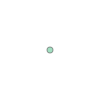

In [272]:
gdf_results['geometry'][0]

In [273]:
oil = list(gdf_results['Producto'].unique())
oil

['DIESEL', 'REGULAR', 'SUPER']

In [315]:
gdf_results_2 = gdf_results[gdf_results['Producto']==oil[1]]
gdf_results_2.reset_index(inplace =  True)
gdf_results_2.drop(columns= 'index' , inplace = True)

C:\Users\Lopez\AppData\Local\Temp\ipykernel_5696\3804081380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_results_2.drop(columns= 'index' , inplace = True)


In [316]:
gdf_results_2.columns

Index(['Periodo', 'Mes', 'Codigo_departamento', 'Departamento',
       'Codigo_municipio', 'Municipio', 'Nombre_comercial', 'Bandera',
       'Direccion', 'Producto', 'Precio', 'Estado', 'Full_Address', 'Coords',
       'LAT', 'LNG', 'POINT', 'SOURCE', 'DISTANCE', 'geometry'],
      dtype='object')

In [317]:
gdf_results_2['Precio'].min()

34.5

In [318]:
gdf_results_2['Precio'].max()

36.5

In [319]:
def marker_rest(df,mapa,unit,oil,icono):
    
    df = df[df['Producto']==oil]
    df = df.reset_index()
    df = df.drop(columns = 'index')
    
    for i in range(len(df)):
        
        if df['Precio'][i]==df['Precio'].min():
        
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)
            



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkgreen', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup = popup).add_to(mapa)
        
        elif df['Precio'][i]==df['Precio'].max():
        
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkred', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)
        else :
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='orange', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)
                           
    return

# Show Map

In [320]:
m = folium.Map([geo_source[0],geo_source[1]], zoom_start= 15)

folium.Circle(
    
    radius = int(radio)*1000,
    location = [geo_source[0],geo_source[1]],
    color = 'green',
    fill = 'green'

).add_to(m)

folium.Marker(

            location = [geo_source[0],geo_source[1]],
            icon =  folium.Icon(color='black',icon_color='white',
            icon = "home",prefix = 'glyphicon'),
            popup = "<b>VILLA SOL ZONA 12</b>").add_to(m)

marker_rest(gdf_results_2,m,unit,oil[1],'usd')

m